In [1]:
%load_ext autoreload
%autoreload 2

from setup_func import *

from kkplot import kk_boxplot


In [2]:
path_to_summary = f'{data_dir}/clean_all_group_df_summary.csv'
path_to_longform = f'{data_dir}/clean_all_group_longform.csv'

summary_df = pd.read_csv(path_to_summary, index_col=0)
longform = pd.read_csv(path_to_longform, index_col=0)

alcohol_longform = longform[longform['Group'] == 'alcohol']
cannabis_longform = longform[longform['Group'] == 'cannabis']


In [3]:
batches = {
    'alcohol': None,
    'cannabis': None,
}

## Craving parameter distribution for all addictive cue data

In [4]:
save_fit_path=f'{results_dir}/decision/'
if os.path.exists(f'{decision_results_dir}/alcohol_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{decision_results_dir}/alcohol_decision_models.pkl', 'rb') as f:
        modout = pickle.load(f)


Loading existing decision models


In [5]:
fitted_craving_modout = {}
fitted_craving_modout['alcohol'] = {}
fitted_craving_modout['cannabis'] = {}

chosen_model = 'd_lrbias_rw'
block = 'other'

if not os.path.exists(craving_results_dir):
    os.makedirs(craving_results_dir)
if os.path.exists(f'{craving_results_dir}/alcohol_{chosen_model}_{block}_craving_models.pkl'):
    print('Loading existing craving models')
    with open(f'{craving_results_dir}/alcohol_{chosen_model}_{block}_craving_models.pkl', 'rb') as f:
        fitted_craving_modout['alcohol'] = pickle.load(f)
if os.path.exists(f'{craving_results_dir}/cannabis_{chosen_model}_{block}_craving_models.pkl'):
    print('Loading existing craving models')
    with open(f'{craving_results_dir}/cannabis_{chosen_model}_{block}_craving_models.pkl', 'rb') as f:
        fitted_craving_modout['cannabis'] = pickle.load(f)

Loading existing craving models
Loading existing craving models


In [6]:
param_df = pd.DataFrame()
block = 'other'

pivot_param_df = {
    'alcohol': {},
    'cannabis': {}
}

for model_name in [
    # 'a_outcome_geodecay', 
    # 'b_ev_geodecay', 'c_rpe_geodecay', 
    # 'd_outcome_ev_geodecay', 'e_outcome_rpe_geodecay', 
    'f_ev_rpe_geodecay', 
    # 'g_outcome_ev_rpe_geodecay'
]:
    alcohol_param_est = fitted_craving_modout['alcohol'][f'{model_name}_other']['fit']['params']
    cannabis_param_est = fitted_craving_modout['cannabis'][f'{model_name}_other']['fit']['params']
    pivot_param_df['alcohol'][model_name] = pd.DataFrame(alcohol_param_est, columns=['craving_baseline', 'ev_weight', 'rpe_weight'])
    pivot_param_df['cannabis'][model_name] = pd.DataFrame(cannabis_param_est, columns=['craving_baseline', 'ev_weight', 'rpe_weight'])

    for i, param in enumerate(fitted_craving_modout['alcohol'][f'{model_name}_other']['fit']['param_names']):
        param_df = pd.concat([
            param_df,
            pd.DataFrame({
                'model': [model_name] * alcohol_param_est.shape[0],
                'group': ['alcohol']*alcohol_param_est.shape[0],
                'param': [param]*alcohol_param_est.shape[0],
                'value': alcohol_param_est[:, i]
            })
        ])

    for i, param in enumerate(fitted_craving_modout['cannabis'][f'{model_name}_other']['fit']['param_names']):
        param_df = pd.concat([
            param_df,
            pd.DataFrame({
                'model': [model_name] * cannabis_param_est.shape[0],
                'group': ['cannabis']*cannabis_param_est.shape[0],
                'param': [param]*cannabis_param_est.shape[0],
                'value': cannabis_param_est[:, i]
            })
        ])
param_df

,model,group,param,value
0,f_ev_rpe_geodecay,alcohol,craving_baseline,3.380073
1,f_ev_rpe_geodecay,alcohol,craving_baseline,22.925540
2,f_ev_rpe_geodecay,alcohol,craving_baseline,27.444526
3,f_ev_rpe_geodecay,alcohol,craving_baseline,0.941932
4,f_ev_rpe_geodecay,alcohol,craving_baseline,18.205484
...,...,...,...,...
60,f_ev_rpe_geodecay,cannabis,rpe_weight,1.247956
61,f_ev_rpe_geodecay,cannabis,rpe_weight,0.447111
62,f_ev_rpe_geodecay,cannabis,rpe_weight,3.319184
63,f_ev_rpe_geodecay,cannabis,rpe_weight,-0.766139


craving_baseline alcohol mean: 17.933 std: 12.894
craving_baseline alcohol median: 17.855
craving_baseline cannabis mean: 18.610 std: 12.606
craving_baseline cannabis median: 15.588
ev_weight alcohol mean: 0.173 std: 0.358
ev_weight alcohol median: 0.105
ev_weight cannabis mean: 0.108 std: 0.497
ev_weight cannabis median: 0.087
rpe_weight alcohol mean: 0.663 std: 1.106
rpe_weight alcohol median: 0.454
rpe_weight cannabis mean: 0.071 std: 1.684
rpe_weight cannabis median: -0.115


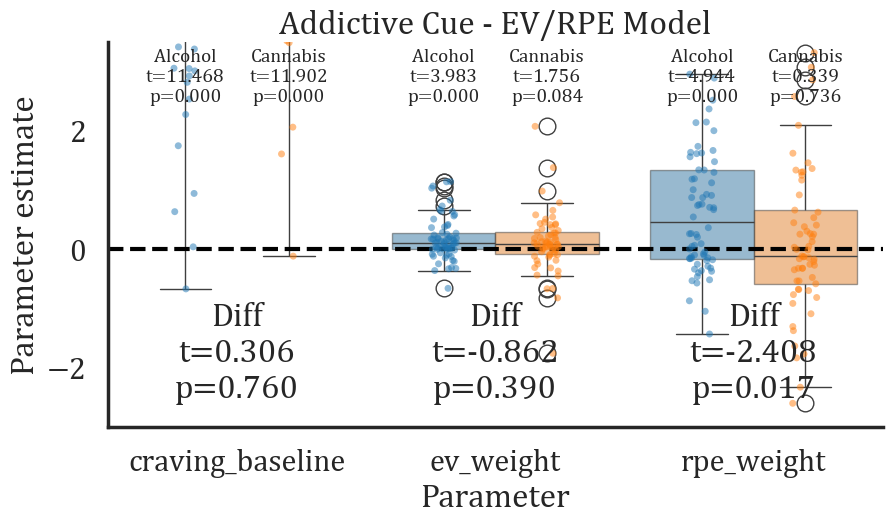

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
model_name = 'f_ev_rpe_geodecay'
model_df = param_df[param_df['model'] == model_name]
no_craving_baseline_df = model_df[model_df['param'] != 'cravng_baseline']
no_diff_df = no_craving_baseline_df[no_craving_baseline_df['group'] != 'diff']
sns.boxplot(data=no_diff_df, x='param', y='value', hue='group', ax=ax, dodge=True, boxprops=dict(alpha=0.5))
sns.stripplot(data=no_diff_df, x='param', y='value', hue='group', ax=ax, dodge=True, alpha=0.5)
ax.axhline(0, color='black', linestyle='--')
ax.set_title('Addictive Cue - EV/RPE Model')
ax.set_ylabel('Parameter estimate')
ax.set_xlabel('Parameter')
# Remove legend
ax.get_legend().remove()
ax.set_ylim(-3, 3.5)
# Annotate with p-values for diff group from 0
for i, param in enumerate(no_diff_df['param'].unique()):
    alcohol_values = no_diff_df[(no_diff_df['param'] == param) & (no_diff_df['group'] == 'alcohol')]['value']
    cannabis_values = no_diff_df[(no_diff_df['param'] == param) & (no_diff_df['group'] == 'cannabis')]['value']
    # diff_values = no_diff_df[(no_diff_df['param'] == param) & (no_diff_df['group'] == 'diff')]['value']
    t, p = stats.ttest_1samp(alcohol_values, 0)
    ax.annotate(f'Alcohol\nt={t:.3f}\np={p:.3f}', (i-0.2, 2.5), ha='center', fontsize=14)
    # print mean and std for alcohol
    print(f'{param} alcohol mean: {alcohol_values.mean():.3f} std: {alcohol_values.std():.3f}')
    # print median for alcohol
    print(f'{param} alcohol median: {alcohol_values.median():.3f}')
    t, p = stats.ttest_1samp(cannabis_values, 0)
    ax.annotate(f'Cannabis\nt={t:.3f}\np={p:.3f}', (i+0.2, 2.5), ha='center', fontsize=14)
    # print mean and std for cannabis
    print(f'{param} cannabis mean: {cannabis_values.mean():.3f} std: {cannabis_values.std():.3f}')
    # print median for cannabis
    print(f'{param} cannabis median: {cannabis_values.median():.3f}')
    t, p = stats.ttest_ind(cannabis_values, alcohol_values)
    ax.annotate(f'Diff\nt={t:.3f}\np={p:.3f}', (i, -2.5), ha='center')
sns.despine()
plt.show()

                  craving_baseline  ev_weight  rpe_weight
craving_baseline          1.000000  -0.021753    0.137240
ev_weight                -0.021753   1.000000    0.486128
rpe_weight                0.137240   0.486128    1.000000


SignificanceResult(statistic=0.3637057678360117, pvalue=0.0022980554286351376)

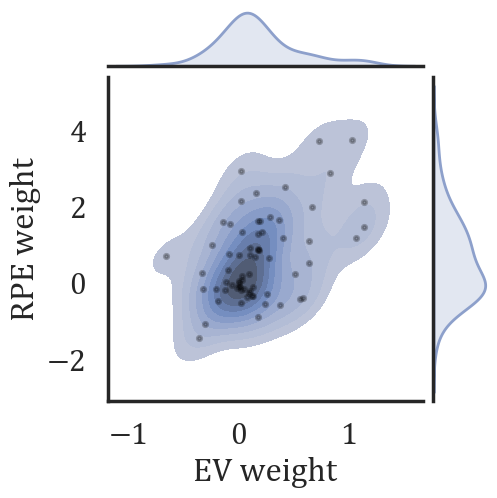

In [8]:
group_param_df = pivot_param_df['alcohol'][model_name]
grid = sns.jointplot(data=group_param_df, x='ev_weight', y='rpe_weight', kind='kde', fill=True, color=sns.palettes.color_palette('Set2')[2], height=5.5)
# grid.ax_joint.scatter(brief_param_df['lr'], brief_param_df['mod'], color='black', alpha=0.45, s=brief_param_df['beta']*20)
grid.ax_joint.scatter(group_param_df['ev_weight'], group_param_df['rpe_weight'], color='black', alpha=0.25, s=10)
grid.ax_joint.set_xlabel('')
grid.ax_joint.set_ylabel('')
print(group_param_df.corr())
# grid.savefig(f'{figure_dir}/fig3_alcohol_evrpe_other_param_jointplot.svg', format='svg', dpi=300, transparent=True)
grid.ax_joint.set_xlabel('EV weight')
grid.ax_joint.set_ylabel('RPE weight')
stats.spearmanr(group_param_df['ev_weight'], group_param_df['rpe_weight'])

Text(0.5, 0, 'Craving baseline')

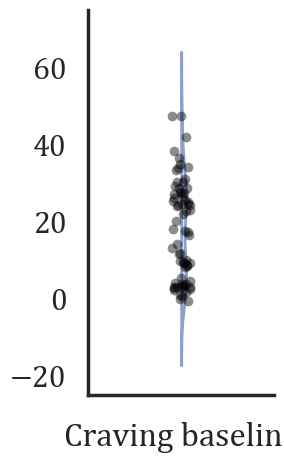

In [9]:
fig, ax = plt.subplots(figsize=(2.4, 5))
sns.kdeplot(y=group_param_df['craving_baseline'], color=sns.palettes.color_palette('Set2')[2], fill=True, ax=ax)
# sns.boxplot(y=group_param_df['craving_baseline'], color=sns.palettes.color_palette('Set2')[2], ax=ax)
sns.stripplot(y=group_param_df['craving_baseline'], color='black', alpha=0.45, s=7, jitter=0.05, ax=ax)
ax.set_ylim(-25, 75)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
# fig.savefig(f'{figure_dir}/fig3_alcohol_craving_baseline_other_kde.svg', format='svg', dpi=300, transparent=True)
ax.set_xlabel('Craving baseline')

                  craving_baseline  ev_weight  rpe_weight
craving_baseline          1.000000  -0.176047   -0.078745
ev_weight                -0.176047   1.000000    0.293051
rpe_weight               -0.078745   0.293051    1.000000


SignificanceResult(statistic=0.3055506993006993, pvalue=0.013318571313442329)

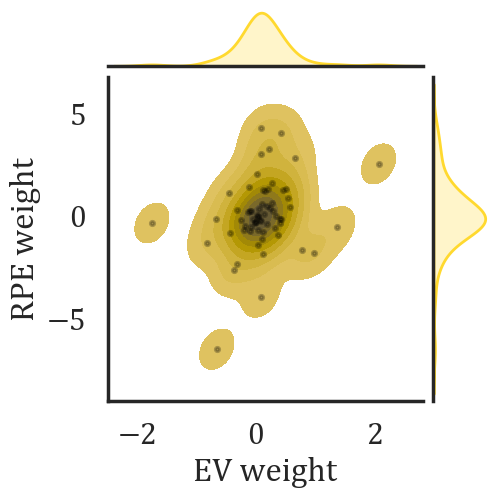

In [10]:
group_param_df = pivot_param_df['cannabis'][model_name]
grid = sns.jointplot(data=group_param_df, x='ev_weight', y='rpe_weight', kind='kde', fill=True, color=sns.palettes.color_palette('Set2')[5], height=5.5)
# grid.ax_joint.scatter(brief_param_df['lr'], brief_param_df['mod'], color='black', alpha=0.45, s=brief_param_df['beta']*20)
grid.ax_joint.scatter(group_param_df['ev_weight'], group_param_df['rpe_weight'], color='black', alpha=0.25, s=10)
grid.ax_joint.set_xlabel('')
grid.ax_joint.set_ylabel('')
print(group_param_df.corr())
# grid.savefig(f'{figure_dir}/fig3_cannabis_evrpe_other_param_jointplot.svg', format='svg', dpi=300, transparent=True)
grid.ax_joint.set_xlabel('EV weight')
grid.ax_joint.set_ylabel('RPE weight')
stats.spearmanr(group_param_df['ev_weight'], group_param_df['rpe_weight'])

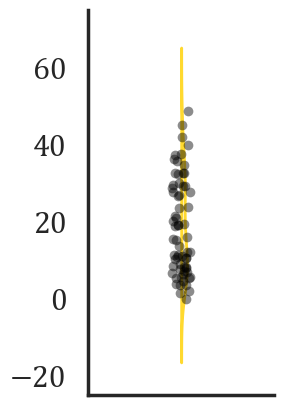

In [11]:
fig, ax = plt.subplots(figsize=(2.4, 5))
sns.kdeplot(y=group_param_df['craving_baseline'], color=sns.palettes.color_palette('Set2')[5], fill=True, ax=ax)
# sns.boxplot(y=group_param_df['craving_baseline'], color=sns.palettes.color_palette('Set2')[5], ax=ax)
sns.stripplot(y=group_param_df['craving_baseline'], color='black', alpha=0.45, s=7, jitter=0.05, ax=ax)
ax.set_ylim(-25, 75)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
# fig.savefig(f'{figure_dir}/fig3_cannabis_craving_baseline_other_kde.svg', format='svg', dpi=300, transparent=True)

## EMFit for all money data

In [12]:
fitted_craving_modout = {}
fitted_craving_modout['alcohol'] = {}
fitted_craving_modout['cannabis'] = {}

chosen_model = 'o_add_rewbias_rw'
block = 'money'

if os.path.exists(f'{craving_results_dir}/alcohol_{chosen_model}_{block}_craving_models.pkl'):
    print('Loading existing craving models')
    with open(f'{craving_results_dir}/alcohol_{chosen_model}_{block}_craving_models.pkl', 'rb') as f:
        fitted_craving_modout['alcohol'] = pickle.load(f)
if os.path.exists(f'{craving_results_dir}/cannabis_{chosen_model}_{block}_craving_models.pkl'):
    print('Loading existing craving models')
    with open(f'{craving_results_dir}/cannabis_{chosen_model}_{block}_craving_models.pkl', 'rb') as f:
        fitted_craving_modout['cannabis'] = pickle.load(f)

Loading existing craving models
Loading existing craving models


In [13]:
param_df = pd.DataFrame()
block = 'money'

pivot_param_df = {
    'alcohol': {},
    'cannabis': {}
}

for model_name in [
    # 'a_outcome_geodecay', 
    # 'b_ev_geodecay', 'c_rpe_geodecay', 
    # 'd_outcome_ev_geodecay', 'e_outcome_rpe_geodecay', 
    'f_ev_rpe_geodecay', 
    # 'g_outcome_ev_rpe_geodecay'
]:
    alcohol_param_est = fitted_craving_modout['alcohol'][f'{model_name}_money']['fit']['params']
    cannabis_param_est = fitted_craving_modout['cannabis'][f'{model_name}_money']['fit']['params']
    pivot_param_df['alcohol'][model_name] = pd.DataFrame(alcohol_param_est, columns=['craving_baseline', 'ev_weight', 'rpe_weight'])
    pivot_param_df['cannabis'][model_name] = pd.DataFrame(cannabis_param_est, columns=['craving_baseline', 'ev_weight', 'rpe_weight'])

    for i, param in enumerate(fitted_craving_modout['alcohol'][f'{model_name}_money']['fit']['param_names']):
        param_df = pd.concat([
            param_df,
            pd.DataFrame({
                'model': [model_name] * alcohol_param_est.shape[0],
                'group': ['alcohol']*alcohol_param_est.shape[0],
                'param': [param]*alcohol_param_est.shape[0],
                'value': alcohol_param_est[:, i]
            })
        ])

    for i, param in enumerate(fitted_craving_modout['cannabis'][f'{model_name}_money']['fit']['param_names']):
        param_df = pd.concat([
            param_df,
            pd.DataFrame({
                'model': [model_name] * cannabis_param_est.shape[0],
                'group': ['cannabis']*cannabis_param_est.shape[0],
                'param': [param]*cannabis_param_est.shape[0],
                'value': cannabis_param_est[:, i]
            })
        ])
param_df

,model,group,param,value
0,f_ev_rpe_geodecay,alcohol,craving_baseline,2.094856
1,f_ev_rpe_geodecay,alcohol,craving_baseline,-0.261987
2,f_ev_rpe_geodecay,alcohol,craving_baseline,25.410351
3,f_ev_rpe_geodecay,alcohol,craving_baseline,5.153111
4,f_ev_rpe_geodecay,alcohol,craving_baseline,14.893374
...,...,...,...,...
60,f_ev_rpe_geodecay,cannabis,rpe_weight,0.003624
61,f_ev_rpe_geodecay,cannabis,rpe_weight,0.711311
62,f_ev_rpe_geodecay,cannabis,rpe_weight,0.049366
63,f_ev_rpe_geodecay,cannabis,rpe_weight,2.601381


craving_baseline alcohol mean: 17.175 std: 12.524
craving_baseline cannabis mean: 16.469 std: 13.364
ev_weight alcohol mean: 0.010 std: 0.497
ev_weight cannabis mean: 0.162 std: 0.347
rpe_weight alcohol mean: 0.219 std: 1.754
rpe_weight cannabis mean: 0.317 std: 1.935


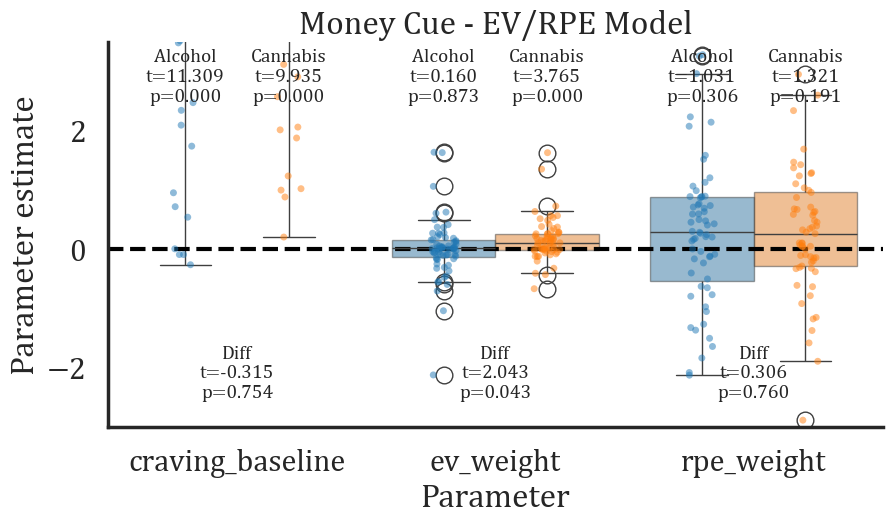

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
model_name = 'f_ev_rpe_geodecay'
model_df = param_df[param_df['model'] == model_name]
no_craving_baseline_df = model_df[model_df['param'] != 'xyz']
no_diff_df = no_craving_baseline_df[no_craving_baseline_df['group'] != 'diff']
sns.boxplot(data=no_diff_df, x='param', y='value', hue='group', ax=ax, dodge=True, boxprops=dict(alpha=0.5))
sns.stripplot(data=no_diff_df, x='param', y='value', hue='group', ax=ax, dodge=True, alpha=0.5)
ax.axhline(0, color='black', linestyle='--')
ax.set_title('Money Cue - EV/RPE Model')
ax.set_ylabel('Parameter estimate')
ax.set_xlabel('Parameter')
# Remove legend
ax.get_legend().remove()
ax.set_ylim(-3, 3.5)
# Annotate with p-values for diff group from 0
for i, param in enumerate(no_diff_df['param'].unique()):
    alcohol_values = no_diff_df[(no_diff_df['param'] == param) & (no_diff_df['group'] == 'alcohol')]['value']
    cannabis_values = no_diff_df[(no_diff_df['param'] == param) & (no_diff_df['group'] == 'cannabis')]['value']
    # diff_values = no_diff_df[(no_diff_df['param'] == param) & (no_diff_df['group'] == 'diff')]['value']
    t, p = stats.ttest_1samp(alcohol_values, 0)
    ax.annotate(f'Alcohol\nt={t:.3f}\np={p:.3f}', (i-0.2, 2.5), ha='center', fontsize=14)
    # print mean and std for alcohol
    print(f'{param} alcohol mean: {alcohol_values.mean():.3f} std: {alcohol_values.std():.3f}')
    t, p = stats.ttest_1samp(cannabis_values, 0)
    ax.annotate(f'Cannabis\nt={t:.3f}\np={p:.3f}', (i+0.2, 2.5), ha='center', fontsize=14)
    # print mean and std for cannabis
    print(f'{param} cannabis mean: {cannabis_values.mean():.3f} std: {cannabis_values.std():.3f}')
    t, p = stats.ttest_ind(cannabis_values, alcohol_values)
    ax.annotate(f'Diff\nt={t:.3f}\np={p:.3f}', (i, -2.5), ha='center', fontsize=14)
sns.despine()
plt.show()

                  craving_baseline  ev_weight  rpe_weight
craving_baseline          1.000000  -0.159922    0.049402
ev_weight                -0.159922   1.000000    0.230864
rpe_weight                0.049402   0.230864    1.000000


SignificanceResult(statistic=0.3790510363782112, pvalue=0.0014343860212067349)

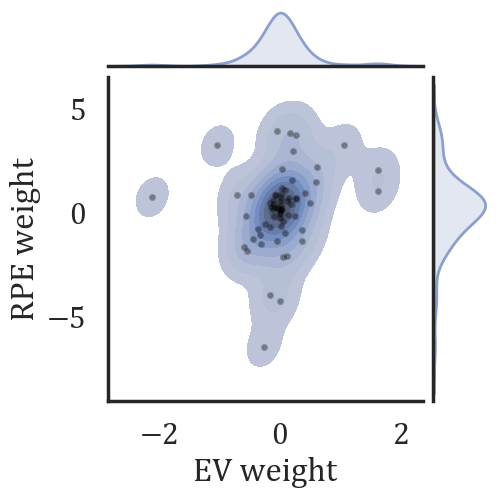

In [15]:
group_param_df = pivot_param_df['alcohol'][model_name]
grid = sns.jointplot(data=group_param_df, x='ev_weight', y='rpe_weight', kind='kde', fill=True, color=sns.palettes.color_palette('Set2')[2], height=5.5)
# grid.ax_joint.scatter(brief_param_df['lr'], brief_param_df['mod'], color='black', alpha=0.45, s=brief_param_df['beta']*20)
grid.ax_joint.scatter(group_param_df['ev_weight'], group_param_df['rpe_weight'], color='black', alpha=0.25, s=10)
grid.ax_joint.set_xlabel('')
grid.ax_joint.set_ylabel('')
print(group_param_df.corr())
# grid.savefig(f'{figure_dir}/supp/supp_fig5_alcohol_evrpe_money_param_jointplot.svg', format='svg', dpi=300, transparent=True)
grid.ax_joint.set_xlabel('EV weight')
grid.ax_joint.set_ylabel('RPE weight')
stats.spearmanr(group_param_df['ev_weight'], group_param_df['rpe_weight'])

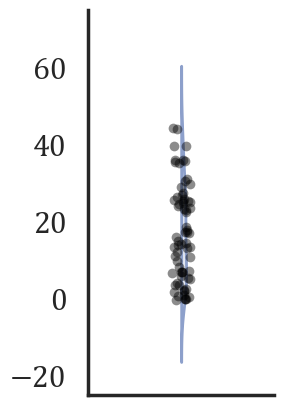

In [16]:
fig, ax = plt.subplots(figsize=(2.4, 5))
sns.kdeplot(y=group_param_df['craving_baseline'], color=sns.palettes.color_palette('Set2')[2], fill=True, ax=ax)
# sns.boxplot(y=group_param_df['craving_baseline'], color=sns.palettes.color_palette('Set2')[2], ax=ax)
sns.stripplot(y=group_param_df['craving_baseline'], color='black', alpha=0.45, s=7, jitter=0.05, ax=ax)
ax.set_ylim(-25, 75)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
# fig.savefig(f'{figure_dir}/supp/supp_fig5_alcohol_craving_baseline_money_kde.svg', format='svg', dpi=300, transparent=True)

                  craving_baseline  ev_weight  rpe_weight
craving_baseline          1.000000   0.041119    0.070739
ev_weight                 0.041119   1.000000    0.215713
rpe_weight                0.070739   0.215713    1.000000


SignificanceResult(statistic=0.24012237762237762, pvalue=0.05402248853585099)

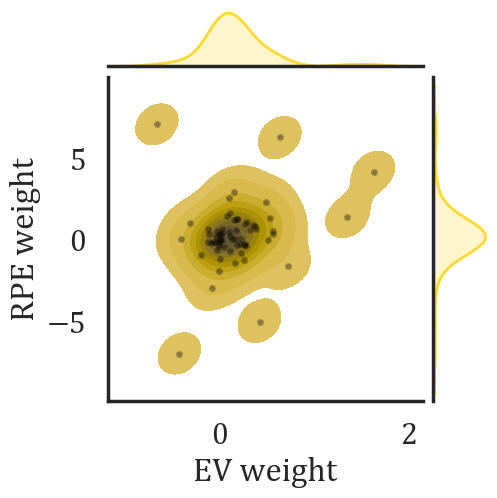

In [17]:
group_param_df = pivot_param_df['cannabis'][model_name]
grid = sns.jointplot(data=group_param_df, x='ev_weight', y='rpe_weight', kind='kde', fill=True, color=sns.palettes.color_palette('Set2')[5], height=5.5)
# grid.ax_joint.scatter(brief_param_df['lr'], brief_param_df['mod'], color='black', alpha=0.45, s=brief_param_df['beta']*20)
grid.ax_joint.scatter(group_param_df['ev_weight'], group_param_df['rpe_weight'], color='black', alpha=0.25, s=10)
grid.ax_joint.set_xlabel('')
grid.ax_joint.set_ylabel('')
print(group_param_df.corr())
# grid.savefig(f'{figure_dir}/supp/supp_fig5_cannabis_evrpe_money_param_jointplot.svg', format='svg', dpi=300, transparent=True)
grid.ax_joint.set_xlabel('EV weight')
grid.ax_joint.set_ylabel('RPE weight')
stats.spearmanr(group_param_df['ev_weight'], group_param_df['rpe_weight'])

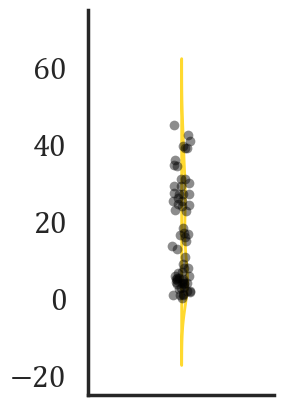

In [18]:
fig, ax = plt.subplots(figsize=(2.4, 5))
sns.kdeplot(y=group_param_df['craving_baseline'], color=sns.palettes.color_palette('Set2')[5], fill=True, ax=ax)
# sns.boxplot(y=group_param_df['craving_baseline'], color=sns.palettes.color_palette('Set2')[5], ax=ax)
sns.stripplot(y=group_param_df['craving_baseline'], color='black', alpha=0.45, s=7, jitter=0.05, ax=ax)
ax.set_ylim(-25, 75)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
# fig.savefig(f'{figure_dir}/supp/supp_fig5_cannabis_craving_baseline_money_kde.svg', format='svg', dpi=300, transparent=True)